## Exploratory Data Analysis for House Prices in Seattle
01. First Look
02. Fixing of Missing Values
02. Fixing of Data Types
03. Getting dummy Variables
04. Interesting Correlations in Data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels as sm

# no scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Style
plt.style.use('Solarize_Light2')

In [2]:
import os
os.chdir('D:\DataScienceBC\Datensatz')

### First Look
Check Dataset Format and Metadata

1.	id - unique identified for a house
2.	dateDate - house was sold
3.	pricePrice - is prediction target
4.	bedroomsNumber - # of bedrooms
5.	bathroomsNumber - # of bathrooms
6.	sqft_livingsquare - footage of the home
7.	sqft_lotsquare - footage of the lot
8.	floorsTotal - floors (levels) in house
9.	waterfront - House which has a view to a waterfront
10.	view - Has been viewed
11.	condition - How good the condition is ( Overall )
12.	grade - overall grade given to the housing unit, based on King County grading system
13.	sqft_above - square footage of house apart from basement
14.	sqft_basement - square footage of the basement
15.	yr_built - Built Year
16.	yr_renovated - Year when house was renovated
17.	zipcode - zip
18.	lat - Latitude coordinate
19.	long - Longitude coordinate
20.	sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21.	sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


##### Grade
<br>
Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.)<br>
<br>
Source<br>
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g

In [3]:
# Loading the Dataset of house prices
#df = pd.read_csv("kc_house_prices/King_County_House_prices_dataset.csv")
df = pd.read_csv("King_County_House_prices_dataset.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [4]:
df.shape
# We have 20 Features, 1 Target
# 21597 Observations

(21597, 21)

In [5]:
# Check Metadata and Columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


### Checking for Missing Values

In [7]:
# find and treat nans 
missing = pd.DataFrame(df.isnull().sum()).rename(columns={0:'total'})
missing['percent'] = missing.total/len(df)*100
missing = missing[missing.total !=0]
missing = missing.sort_values('percent', ascending=False)
missing

,total,percent
yr_renovated,3842,17.790
waterfront,2376,11.002
view,63,0.292


In [8]:
# Waterfront and view could be inferred from geographical Data
# but will be excluded for now
df = df.dropna(subset=["waterfront", "view"])

In [9]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3402
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
# yr_renovated is missing in almost 18% of the data, which might just mean,
# the house was never renovated. On the other hand, 0 already exists, I guess, for not renovated.
# could be further investigated, for now will set missing values to 0
df[df.isna().any(axis=1)]
df.yr_renovated.unique()

array([1991.,   nan,    0., 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1945.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 2008., 2012.,
       1968., 1963., 1951., 1962., 1953., 1993., 1955., 1996., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1965., 1967., 1934., 1972., 1944., 1958., 1974.])

In [11]:
df.yr_renovated = df.yr_renovated.fillna(0)

### Checking of Data Types
Do Types of Cols fit the description in Metadata

In [12]:
df.dtypes.sort_values()

id                 int64
zipcode            int64
yr_built           int64
sqft_above         int64
grade              int64
sqft_living15      int64
condition          int64
sqft_living        int64
bedrooms           int64
sqft_lot           int64
sqft_lot15         int64
floors           float64
waterfront       float64
view             float64
bathrooms        float64
price            float64
yr_renovated     float64
lat              float64
long             float64
sqft_basement     object
date              object
dtype: object

#### Changes
- Date sold should be of type datetime
- Year built, renovated can be ints as only year is given
- sqft_basement, bathrooms, floors can be of type int
- sqft_basement is object, because there are some not numeric strings in there, should be int
- Zipcode should not be interpreted as a number, so it will be converted to dtype 'category'
- Same with Condition, Grade, View and Waterfront 
- The Id has no valuable information but could impact the prediction, so it will be excluded

In [13]:
df.date = pd.to_datetime(df['date'])

In [14]:
df[['yr_renovated','bathrooms','floors']] = df[['yr_renovated','bathrooms','floors']].astype('int')

In [15]:
df.zipcode = df.zipcode.astype('int').astype('category')
df.view = df.view.astype('int').astype('category')
df.waterfront = df.waterfront.astype('int').astype('category')
df.grade = df.grade.astype('category')
df.condition = df.condition.astype('category')

In [16]:
# weirdness in the basement
df['sqft_basement'].unique()
df[df['sqft_basement']=='?'].shape
# drop rows with 
df.drop(df[df.sqft_basement== '?'].index, inplace=True)

In [17]:
# String can't be converted directly to int--------why
df['sqft_basement'] = df['sqft_basement'].astype('float').astype('int')

In [18]:
# drop ID 
df = df.drop(['id'], axis = 1)

In [19]:
# Interval of Observations
df.date.describe()

<ipython-input-19-fbabe46ffc58>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                   18749
unique                    369
top       2014-06-23 00:00:00
freq                      121
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

### Finding Correlations
1. Convert categorical Data 
2. Correlate, take absolutes
3. Heatmap 

In [20]:
num_corrs = df.corrwith(df.price).sort_values(ascending=False)
num_corrs

price           1.000
sqft_living     0.705
sqft_above      0.610
sqft_living15   0.584
bathrooms       0.512
sqft_basement   0.323
bedrooms        0.309
lat             0.306
floors          0.239
yr_renovated    0.110
sqft_lot        0.088
sqft_lot15      0.082
yr_built        0.054
long            0.022
dtype: float64

In [21]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.shape

(18749, 103)

In [22]:
# Absoluter Wert, damit alle starken corrs oben im Series sind
all_corrs_abs = df_dummy.corrwith(df_dummy.price).abs().sort_values(ascending=False)

In [23]:
all_corrs_abs.head(20)

price           1.000
sqft_living     0.705
sqft_above      0.610
sqft_living15   0.584
bathrooms       0.512
grade_11        0.349
grade_10        0.341
sqft_basement   0.323
grade_7         0.316
view_4          0.310
bedrooms        0.309
lat             0.306
grade_12        0.296
zipcode_98004   0.275
waterfront_1    0.273
floors          0.239
grade_9         0.235
grade_13        0.225
zipcode_98039   0.209
grade_6         0.208
dtype: float64

In [24]:
# fürs modeling
print(list(all_corrs_abs[-30:].index))

['condition_4', 'zipcode_98115', 'grade_4', 'zipcode_98122', 'zipcode_98125', 'zipcode_98019', 'zipcode_98027', 'zipcode_98045', 'zipcode_98028', 'zipcode_98116', 'zipcode_98029', 'long', 'zipcode_98166', 'zipcode_98010', 'zipcode_98059', 'zipcode_98103', 'zipcode_98144', 'zipcode_98007', 'zipcode_98117', 'zipcode_98014', 'zipcode_98011', 'zipcode_98107', 'zipcode_98070', 'zipcode_98072', 'condition_3', 'zipcode_98034', 'zipcode_98065', 'zipcode_98136', 'zipcode_98024', 'grade_8']


In [25]:
df_worst_30 = df_dummy[['condition_4', 'zipcode_98115', 'grade_4', 'zipcode_98122', 'zipcode_98125', 
                        'zipcode_98019', 'zipcode_98027', 'zipcode_98045', 'zipcode_98028', 'zipcode_98116', 
                        'zipcode_98029', 'long', 'zipcode_98166', 'zipcode_98010', 'zipcode_98059', 'zipcode_98103', 
                        'zipcode_98144', 'zipcode_98007', 'zipcode_98117', 'zipcode_98014', 'zipcode_98011', 
                        'zipcode_98107', 'zipcode_98070', 'zipcode_98072', 'condition_3', 'zipcode_98034', 
                        'zipcode_98065', 
                        'zipcode_98136', 'zipcode_98024', 'grade_8']]

In [26]:
df_best_30 = df_dummy[['price', 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade_11', 'grade_10', 
                       'sqft_basement', 'grade_7', 'view_4', 'bedrooms', 'lat', 'grade_12', 
                       'zipcode_98004', 'waterfront_1', 'floors', 'grade_9', 'grade_13', 
                       'zipcode_98039', 'grade_6', 'zipcode_98040', 'view_3', 'zipcode_98112', 'view_2',
                       'zipcode_98006', 'yr_renovated', 
                       'zipcode_98023', 'zipcode_98042', 'zipcode_98033', 'view_1']]

In [27]:
df_best_20 = df_dummy[['price', 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade_11', 
                    'sqft_basement', 'grade_7', 'view_4', 'bedrooms', 'lat', 'grade_12', 
                    'zipcode_98004',  'waterfront_1', 
                    'floors', 'grade_9', 'grade_13', 'zipcode_98039', 'grade_6', 'zipcode_98040']]
new_cors = df_best_20.corr()
new_cors.head()

,price,sqft_living,sqft_above,sqft_living15,bathrooms,grade_11,sqft_basement,grade_7,view_4,bedrooms,lat,grade_12,zipcode_98004,waterfront_1,floors,grade_9,grade_13,zipcode_98039,grade_6,zipcode_98040
price,1.000,0.705,0.610,0.584,0.512,0.349,0.323,-0.316,0.310,0.309,0.306,0.296,0.275,0.273,0.239,0.235,0.225,0.209,-0.208,0.197
sqft_living,0.705,1.000,0.878,0.756,0.700,0.345,0.433,-0.359,0.175,0.577,0.055,0.244,0.116,0.109,0.356,0.315,0.154,0.088,-0.313,0.126
sqft_above,0.610,0.878,1.000,0.732,0.643,0.342,-0.051,-0.386,0.112,0.480,0.004,0.227,0.099,0.074,0.519,0.340,0.135,0.083,-0.282,0.094
sqft_living15,0.584,0.756,0.732,1.000,0.512,0.310,0.198,-0.378,0.156,0.391,0.051,0.188,0.121,0.089,0.297,0.338,0.078,0.082,-0.281,0.151
bathrooms,0.512,0.700,0.643,0.512,1.000,0.252,0.249,-0.306,0.104,0.466,0.035,0.173,0.064,0.061,0.492,0.236,0.105,0.064,-0.285,0.086


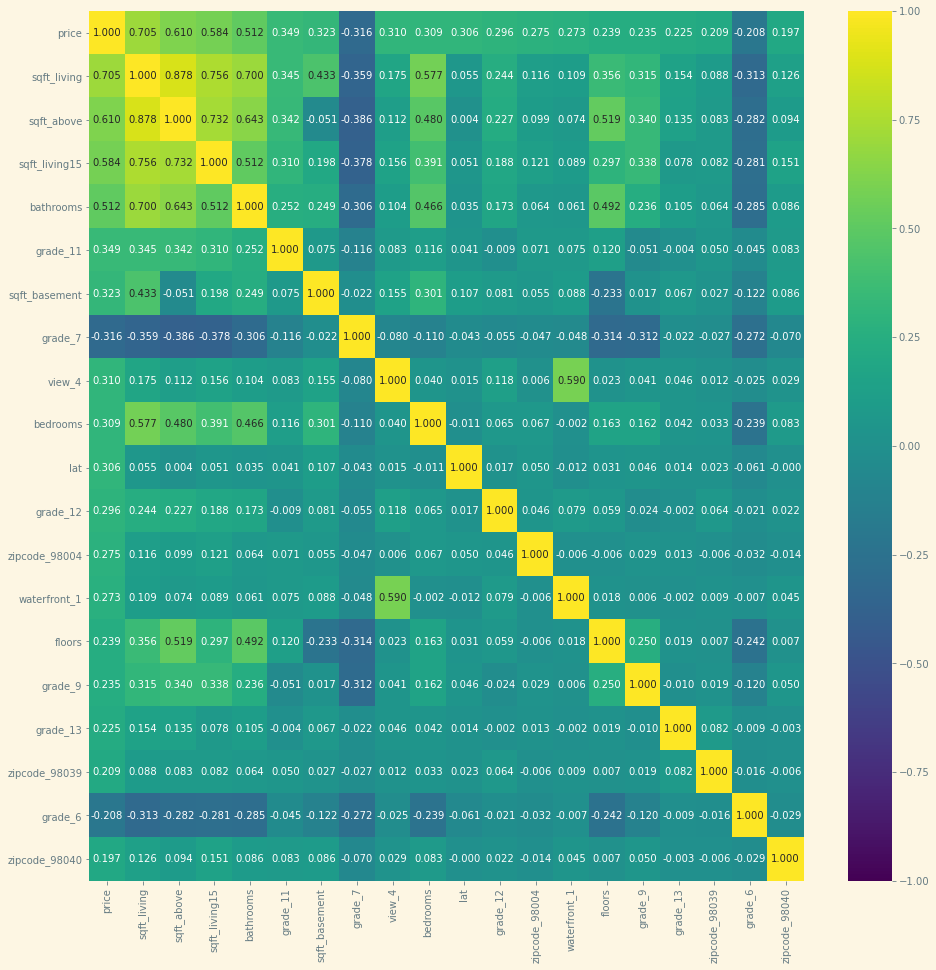

In [28]:
plt.figure(figsize = (16,16))
sns.heatmap(new_cors, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap= 'viridis');

In [29]:
df_best_short = df_best_30[['price', 'sqft_living', 'sqft_above', 'sqft_living15', 
                         'bathrooms', 'grade_11','sqft_basement', 'grade_7', 'view_4', 'bedrooms']]

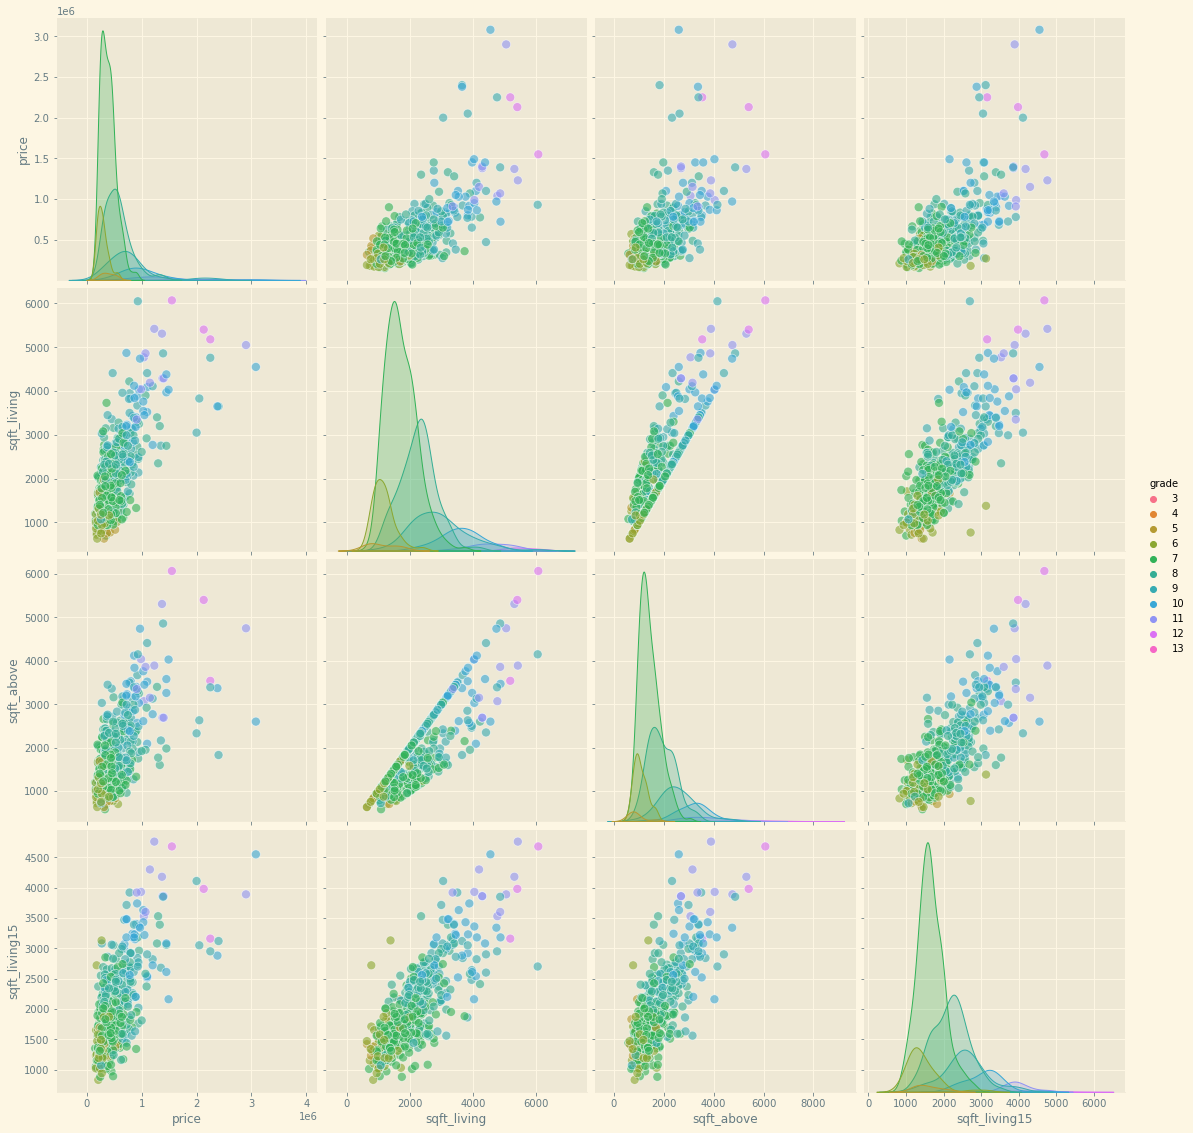

In [30]:
sns.pairplot(df[:500],
             vars = ['price', 'sqft_living', 'sqft_above', 'sqft_living15'],
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'w'},
             diag_kind = 'kde',
             height = 4,
             palette ="husl",
             hue = 'grade');

### Preparation for Modeling

In [31]:
# Neuen Datensatz speichern
# Da sich csv den Datentyp nicht merkt und beim Öffnen errät, parquet nehmen
# dafür conda install fastparquet

# Hier der Datensatz mit allen Variablen ohne dummy
#df.to_parquet('housing_clean.pqt', compression = 'UNCOMPRESSED')

# Datensatz mit allen dummy Variablen für Vis
#df_dummy.to_parquet('housing_clean_dummy.pqt', compression = 'uncompressed')


###Modeling###
#Datensatz mit allen außer Date
#df_dummy_mod = df_dummy.drop('date', axis=1)
#df_dummy_mod.to_parquet('df_dummy_all.pqt', compression = 'uncompressed')

# Datensatz mit 30 besten dummy Variablen
#df_best_30.to_parquet('housing_clean_dummy_30.pqt', compression = 'uncompressed')

# Datensatz mit den 30 schlechtesten Predictors
#df_worst_30.to_parquet('housing_clean_dummy_worst_30.pqt', compression = 'uncompressed')